In [17]:
x.NumberofCells <- c(0:12)
Counts.conc1 <- c(213, 128, 37, 18, 3, 1, 0, 0, 0, 0, 0, 0, 0)
Counts.conc2 <- c(103, 143, 98, 42, 8, 4, 2, 0, 0, 0, 0, 0, 0)
Counts.conc3 <- c(75, 103, 121, 54, 30, 13, 2, 1, 0, 1, 0, 0, 0)
Counts.conc4 <- c(0, 20, 43, 53, 86, 70, 54, 37, 18, 10, 5, 2, 2)

In [18]:
mu1hat.conc1 = sum(Counts.conc1 * x.NumberofCells) / sum(Counts.conc1)
mu2hat.conc1 = sum(Counts.conc1 * (x.NumberofCells)^2) / sum(Counts.conc1)
mu1hat.conc2 = sum(Counts.conc2 * x.NumberofCells)/sum(Counts.conc2)
mu2hat.conc2 = sum(Counts.conc2 * (x.NumberofCells)^2)/sum(Counts.conc2)
mu1hat.conc3 = sum(Counts.conc3 * x.NumberofCells)/sum(Counts.conc3)
mu2hat.conc3 = sum(Counts.conc3 * (x.NumberofCells)^2)/sum(Counts.conc3)
mu1hat.conc4 = sum(Counts.conc4 * x.NumberofCells)/sum(Counts.conc4)
mu2hat.conc4 = sum(Counts.conc4 * (x.NumberofCells)^2)/sum(Counts.conc4)

mu2hat.conc1 = mu2hat.conc1 - mu1hat.conc1^2
mu2hat.conc2 = mu2hat.conc2 - mu1hat.conc2^2
mu2hat.conc3 = mu2hat.conc3 - mu1hat.conc3^2
mu2hat.conc4 = mu2hat.conc4 - mu1hat.conc4^2

In [19]:
mu1 <- c(mu1hat.conc1, mu1hat.conc2, mu1hat.conc3, mu1hat.conc4)
print(mu1)

[1] 0.6825 1.3225 1.8000 4.6800


In [20]:
mu2 <- c(mu2hat.conc1, mu2hat.conc2, mu2hat.conc3, mu2hat.conc4)
print(mu2)

[1] 0.8116938 1.2834938 1.9600000 4.4576000


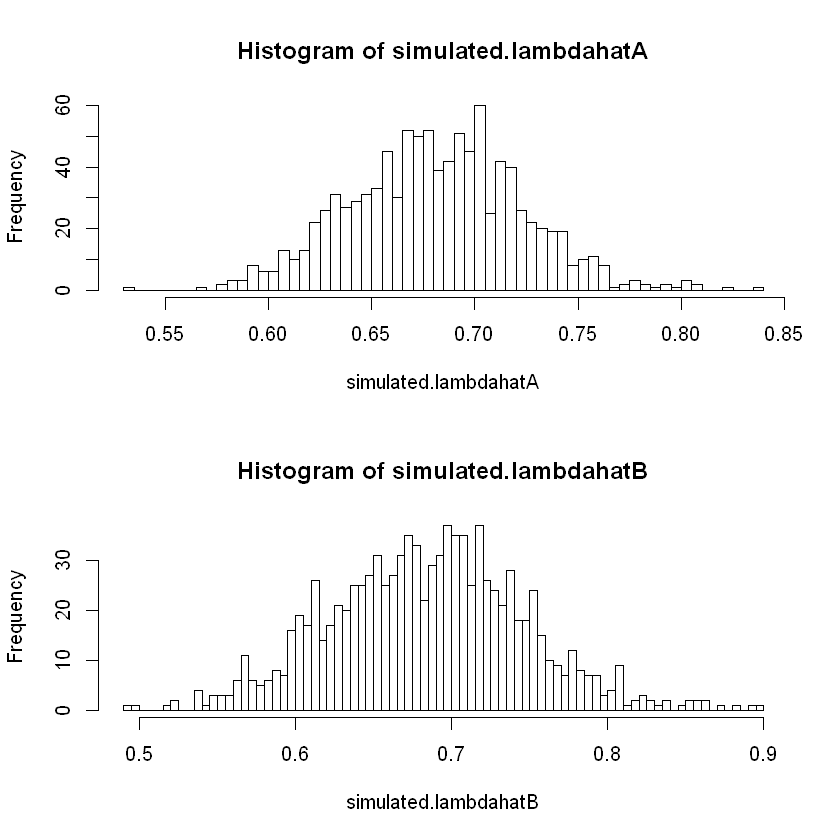

In [21]:
# Simulate n = 400 samples with lambda = 0.6825, with n.simulations = 1000

sample.n = 400
n.simulations = 1000
xmat = matrix(rpois(sample.n * n.simulations, lambda = 0.6825), nrow = sample.n, ncol = n.simulations)

simulated.hatmu1 = colMeans(xmat)
simulated.hatmu2 = colMeans(xmat^2)
simulated.lambdahatA = simulated.hatmu1
simulated.lambdahatB = simulated.hatmu2 - (simulated.hatmu1)^2

# Graph histograms of the sampling distributions
par(mfcol = c(2, 1))
hist(simulated.lambdahatA, breaks = 100)
hist(simulated.lambdahatB, breaks = 100)

In [22]:
mean(simulated.lambdahatA)

[1] 0.6823025

In [23]:
sqrt(var(simulated.lambdahatA))

[1] 0.041646

In [24]:
mean(simulated.lambdahatB)

[1] 0.6841181

In [25]:
sqrt(var(simulated.lambdahatB))

[1] 0.06249417

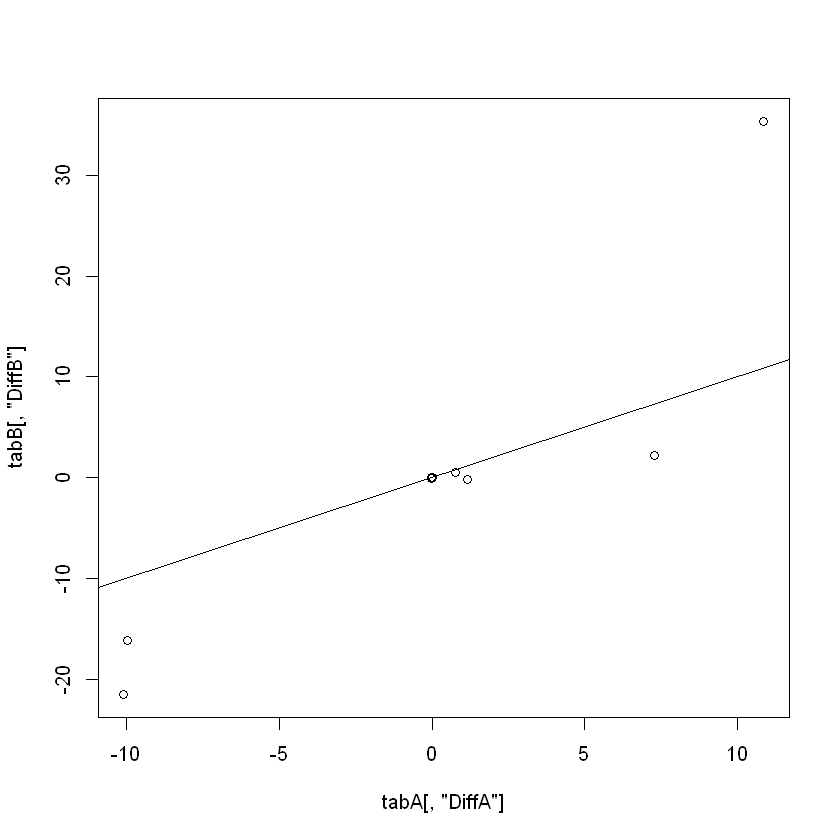

In [26]:
ExpectedCountsA.conc1 = 400 * dpois(x.NumberofCells, lambda = 0.6825)
tabA <- cbind(Counts.conc1, ExpectedCountsA.conc1, DiffA = Counts.conc1 - ExpectedCountsA.conc1)

ExpectedCountsB.conc1 = 400 * dpois(x.NumberofCells, lambda = 0.8117)
tabB <- cbind(Counts.conc1, ExpectedCountsB.conc1, DiffB = Counts.conc1 - ExpectedCountsB.conc1)

par(mfcol = c(1, 1))
plot(tabA[, "DiffA"], tabB[, "DiffB"])
abline(a = 0, b = 1)